In [1]:
import warnings

import geopandas as gpd
import numpy as np
import momepy

from streetscape import StreetScape

In [2]:
warnings.filterwarnings(
    "ignore",
    category=RuntimeWarning,
    message="invalid value encountered in intersection",
)

In [3]:
streets = gpd.read_file(momepy.datasets.get_path("bubenec"), layer="streets")
buildings = gpd.read_file(momepy.datasets.get_path("bubenec"), layer="buildings")

In [4]:
sc = StreetScape(streets, buildings)

In [5]:
sc.compute_sightline_indicators()

In [6]:
df = sc.sightline_df()

<Axes: >

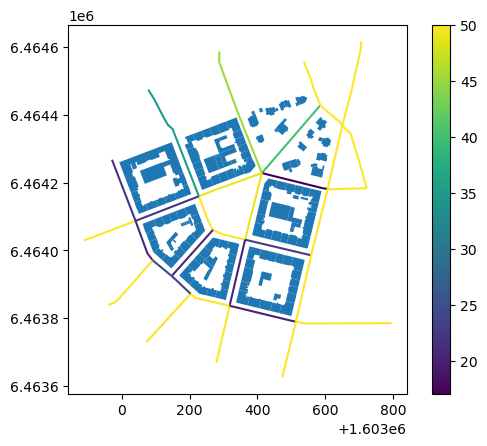

In [7]:
ax = sc.streets.plot(df.left_OS.apply(np.mean).values, legend=True)
buildings.plot(ax=ax)